<a href="https://colab.research.google.com/github/endophenotype/AI/blob/Clustering/%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B5%D0%B9_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.cluster import KMeans
#данная строчка нужна для корректного отображения графиков
%matplotlib inline

In [ ]:
df=pd.read_excel('MonthlyGold1.xlsx')
df.sample(5)

,Date,USD,EUR,JPY,GBP,CAD,CHF,INR,CNY,SAR,IDR,AED,THB,VND,EGP,KRW,RUB,ZAR,AUD
145,1991-02-28,362.70,256.11,48220.78,189.85,417.47,480.78,6917.02,1927.77,1365.46,708074.75,1337.41,9141.06,2662609.11,1106.80,263600.63,0.00,931.10,462.65
375,2010-04-30,1179.25,886.89,110861.29,770.42,1194.40,1271.23,52311.51,8048.62,4422.78,10629759.50,4331.38,38154.63,22379216.88,6555.45,1307021.57,34460.62,8677.10,1266.85
359,2008-12-31,869.75,625.70,78842.83,604.94,1073.71,925.72,42374.21,5934.30,3264.26,9480275.00,3194.64,30249.90,15205839.25,4793.41,1095493.44,26557.81,8040.84,1247.49
401,2012-06-29,1598.50,1259.60,127544.30,1019.16,1629.59,1512.98,89252.23,10157.03,5995.09,15013911.25,5871.29,50768.35,33416642.50,9684.51,1830841.74,51850.22,13073.33,1559.44
487,2019-08-30,1528.40,1387.88,162231.99,1255.00,2030.94,1512.28,109139.19,10920.88,5732.57,21680352.61,5614.04,46727.00,35437480.14,25295.00,1851274.38,101808.61,23206.84,2268.50


In [ ]:
df.info() # информация о столбцах таблицы и типах переменных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    518 non-null    datetime64[ns]
 1   USD     518 non-null    float64       
 2   EUR     518 non-null    float64       
 3   JPY     518 non-null    float64       
 4   GBP     518 non-null    float64       
 5   CAD     518 non-null    float64       
 6   CHF     518 non-null    float64       
 7   INR     518 non-null    float64       
 8   CNY     518 non-null    float64       
 9   TRY     518 non-null    object        
 10  SAR     518 non-null    float64       
 11  IDR     518 non-null    float64       
 12  AED     518 non-null    float64       
 13  THB     518 non-null    float64       
 14  VND     518 non-null    float64       
 15  EGP     518 non-null    float64       
 16  KRW     518 non-null    float64       
 17  RUB     518 non-null    float64       
 18  ZAR     51

In [ ]:
df.describe()

,USD,EUR,JPY,GBP,CAD,CHF,INR,CNY,SAR,IDR,AED,THB,VND,EGP,KRW,RUB,ZAR,AUD
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,5.180000e+02,518.000000,518.000000,5.180000e+02,518.000000,5.180000e+02,518.000000,518.000000,518.000000
mean,708.716506,586.517587,84597.556699,462.127645,862.979170,837.434479,34495.285039,4294.515772,2637.220270,6.472446e+06,2604.392529,22176.631351,1.165174e+07,5498.901622,7.369229e+05,25144.381409,6245.630946,891.821564
std,487.988573,396.384753,46334.630040,359.358501,568.311016,375.754053,37696.465433,3576.785296,1842.280812,7.621822e+06,1791.993602,16120.807971,1.320929e+07,8025.900985,5.987447e+05,36779.374688,7726.876427,600.236501
min,233.700000,144.840000,27937.540000,116.220000,267.100000,379.320000,1840.820000,0.000000,745.200000,1.397393e+05,856.140000,4511.270000,0.000000e+00,0.000000,1.082358e+05,0.000000,194.530000,197.170000
25%,354.787500,307.372500,43165.352500,219.212500,456.650000,502.072500,6295.650000,1725.630000,1317.202500,7.001355e+05,1301.760000,9615.020000,0.000000e+00,939.622500,3.021288e+05,0.000000,974.430000,475.510000
50%,416.125000,369.405000,72124.700000,258.305000,534.765000,712.815000,13216.545000,3052.970000,1524.325000,2.615656e+06,1534.805000,12244.665000,4.265233e+06,1309.005000,3.790226e+05,7744.645000,1942.520000,555.110000
75%,1180.000000,960.445000,126658.385000,759.710000,1356.237500,1138.620000,67744.000000,7478.690000,4425.232500,1.284870e+07,4334.095000,39254.015000,2.538367e+07,8322.012500,1.319516e+06,41909.315000,10182.995000,1389.097500
max,1964.900000,1700.370000,219966.990000,1497.070000,2631.980000,1787.470000,146999.070000,13714.020000,7369.160000,2.868754e+07,7217.370000,62404.350000,4.553950e+07,31379.450000,2.340982e+06,204712.060000,33459.780000,2739.870000


In [ ]:
df.columns

Index(['Date', 'USD', 'EUR', 'JPY', 'GBP', 'CAD', 'CHF', 'INR', 'CNY', 'TRY',
       'SAR', 'IDR', 'AED', 'THB', 'VND', 'EGP', 'KRW', 'RUB', 'ZAR', 'AUD'],
      dtype='object')

In [ ]:
col=['USD', 'EUR', 'RUB'] # !!!!!! количественные (int, float) столбцы

In [ ]:
pd.options.mode.chained_assignment = None
df[col].fillna(0, inplace=True) # заменим пропуски данных нулями

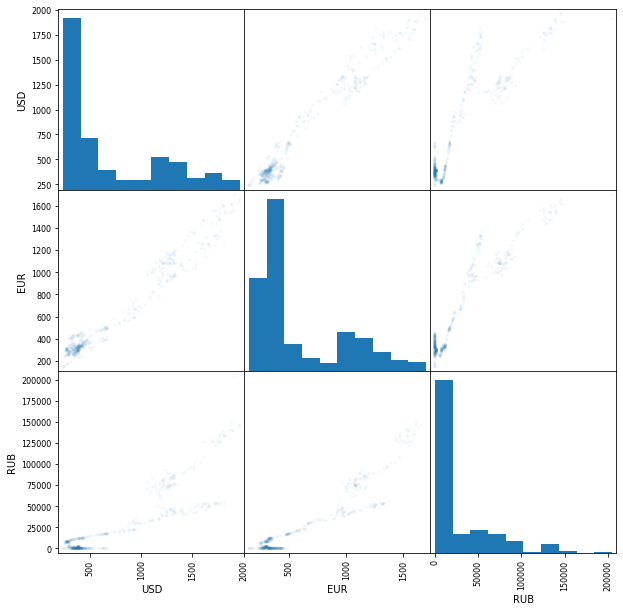

In [ ]:
# матрица рассеивания и гистограммы
from pandas.plotting import scatter_matrix
scatter_matrix(df[col], alpha=0.05, figsize=(10, 10));

In [ ]:
df[col].corr() # посмотрим на парные корреляции

,USD,EUR,RUB
USD,1.000000,0.981523,0.898723
EUR,0.981523,1.000000,0.942496
RUB,0.898723,0.942496,1.000000


In [ ]:
# загружаем библиотеку препроцесинга данных
# эта библиотека автоматически приведен данные к нормальным значениям
from sklearn import preprocessing
dataNorm = preprocessing.MinMaxScaler().fit_transform(df[col].values)

In [ ]:
# Вычислим расстояния между каждым набором данных,
# т.е. строками массива data_for_clust
# Вычисляется евклидово расстояние (по умолчанию)
data_dist = pdist(dataNorm, 'euclidean')
# Главная функция иерархической кластеризии
# Объедение элементов в кластера и сохранение в
# специальной переменной (используется ниже для визуализации
# и выделения количества кластеров
data_linkage = linkage(data_dist, method='average')

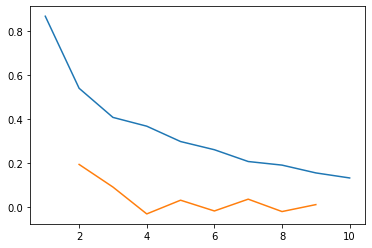

Рекомендованное количество кластеров: 2


In [ ]:
# Метод локтя. Позволячет оценить оптимальное количество сегментов.
# Показывает сумму внутри групповых вариаций
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2
print("Рекомендованное количество кластеров:", k)

In [ ]:
#функция построения дендрограмм
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [ ]:
#  количество кластеров
nClust=6

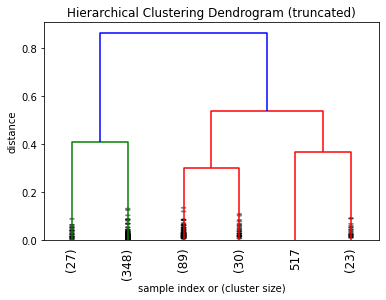

In [ ]:
#строим дендрограмму
fancy_dendrogram(
    data_linkage,
    truncate_mode='lastp',
    p=nClust,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
)
plt.show()

In [ ]:
# иерархическая кластеризация
clusters=fcluster(data_linkage, nClust, criterion='maxclust')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
col

['USD', 'EUR', 'RUB']

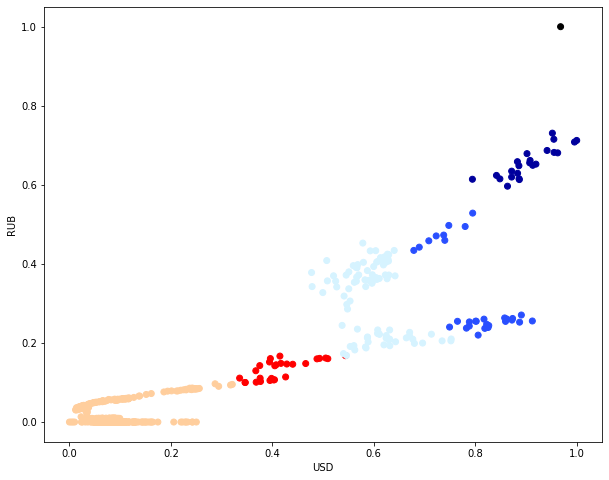

In [ ]:
x=0
y=2
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=clusters, cmap='flag')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

In [ ]:
df['I']=clusters
res=df.groupby('I')[col].mean()
res['Количество']=df.groupby('I').size().values
res #ниже средние цифры по кластерам и количество объектов

,USD,EUR,RUB,Количество
I,,,,
1,953.546296,668.196296,27349.521111,27
2,392.514511,334.649885,3888.056063,348
3,1268.005056,1048.655618,63952.132472,89
4,1619.196667,1292.583333,64974.211333,30
5,1801.571739,1543.844783,134244.817391,23
6,1909.850000,1700.370000,204712.060000,1


In [ ]:
df[df['I']==2]

,Date,USD,EUR,JPY,GBP,CAD,CHF,INR,CNY,TRY,...,IDR,AED,THB,VND,EGP,KRW,RUB,ZAR,AUD,I
0,1979-01-31,233.70,144.84,45160.33,117.44,267.10,379.32,1840.82,0.00,0.0,...,139739.28,856.14,4511.27,0.00,0.00,108235.82,0.00,194.53,197.17,2
1,1979-02-28,251.30,154.64,50209.08,124.19,295.50,413.61,2011.68,0.00,0.0,...,154683.13,946.62,4985.70,0.00,0.00,119929.27,0.00,209.36,219.63,2
2,1979-03-30,240.10,148.04,50274.29,116.22,278.16,406.20,1940.16,0.00,0.0,...,148844.15,910.39,4812.88,0.00,0.00,116123.63,0.00,202.37,214.55,2
3,1979-04-30,245.30,152.76,54144.57,118.82,278.53,420.01,2013.10,0.00,0.0,...,152453.63,930.21,4890.99,0.00,0.00,117423.25,0.00,206.91,221.12,2
4,1979-05-31,274.60,172.00,61057.09,132.69,321.62,478.01,2253.41,0.00,0.0,...,171656.12,1048.41,5560.75,0.00,0.00,133889.58,0.00,233.65,250.72,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2007-08-31,672.00,492.94,77894.88,333.16,710.88,811.98,27468.00,5070.24,875.95,...,6310080.00,2468.29,23056.32,10913280.00,3799.82,630504.00,17236.46,4819.92,826.01,2
344,2007-09-28,743.00,522.45,85456.14,364.69,738.32,867.97,29606.68,5577.03,900.0,...,6794735.00,2727.74,25466.32,11951898.00,4151.51,679956.38,18492.82,5124.28,839.60,2
345,2007-10-31,789.50,545.71,91017.50,380.05,749.87,915.07,31045.89,5892.04,924.7,...,7182081.50,2899.00,26831.15,12695949.50,4356.07,711102.61,19480.52,5162.90,851.90,2
346,2007-11-30,783.50,533.77,86909.73,381.05,783.19,884.61,31046.19,5797.90,923.35,...,7341395.00,2864.16,26519.51,12573216.25,4336.67,721720.95,19169.50,5326.04,885.91,2


In [ ]:
df[df['I']==2][['Date', 'USD', 'EUR', 'RUB']]

,Date,USD,EUR,RUB
0,1979-01-31,233.70,144.84,0.00
1,1979-02-28,251.30,154.64,0.00
2,1979-03-30,240.10,148.04,0.00
3,1979-04-30,245.30,152.76,0.00
4,1979-05-31,274.60,172.00,0.00
...,...,...,...,...
343,2007-08-31,672.00,492.94,17236.46
344,2007-09-28,743.00,522.45,18492.82
345,2007-10-31,789.50,545.71,19480.52
346,2007-11-30,783.50,533.77,19169.50


In [ ]:
# строим кластеризаци методом KMeans
km = KMeans(n_clusters=nClust).fit(dataNorm)

In [ ]:
# выведем полученное распределение по кластерам
# так же номер кластера, к котрому относится строка, так как нумерация начинается с нуля, выводим добавляя 1
km.labels_ +1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 1, 1, 1, 5, 1, 5, 5, 5,
       5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

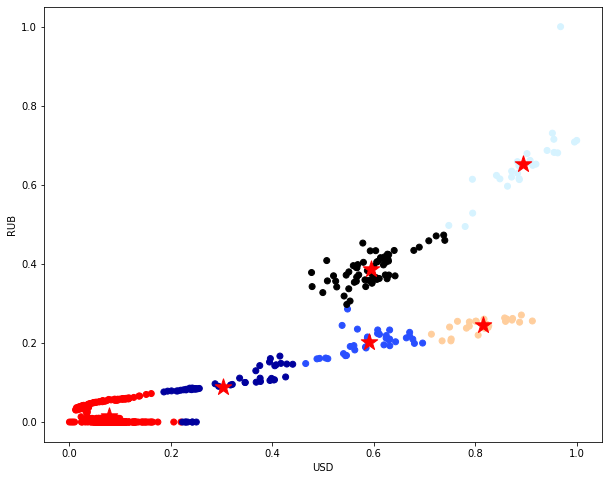

In [ ]:
x=0
y=2
centroids = km.cluster_centers_
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=km.labels_, cmap='flag')
plt.scatter(centroids[:, x], centroids[:, y], marker='*', s=300,
            c='r', label='centroid')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

In [ ]:
# к оригинальным данным добавляем номера кластеров
df['KMeans']=km.labels_+1
res=df.groupby('KMeans')[col].mean()
res['Количество']=df.groupby('KMeans').size().values
res

,USD,EUR,RUB,Количество
KMeans,,,,
1,367.200473,320.982681,2965.321609,317
2,1643.690000,1233.641600,50000.617200,25
3,1780.312963,1536.732593,133465.987778,27
4,1257.635135,936.784324,41391.452703,37
5,756.399038,540.184038,18368.966346,52
6,1261.444167,1116.353167,79075.258667,60


In [ ]:
df[df['KMeans']==5] # номер отображаемого кластера

,Date,USD,EUR,JPY,GBP,CAD,CHF,INR,CNY,TRY,...,AED,THB,VND,EGP,KRW,RUB,ZAR,AUD,I,KMeans
12,1980-01-31,653.00,385.01,159889.73,288.11,774.10,1094.91,5329.61,0.00,0.0,...,2490.45,13763.78,0.00,0.00,387525.23,0.00,546.13,603.75,2,5
13,1980-02-29,637.00,381.48,161055.96,280.25,732.64,1089.66,5138.08,0.00,0.0,...,2393.31,13036.52,0.00,0.00,371647.87,0.00,516.81,583.69,2,5
17,1980-06-30,653.50,392.72,145558.85,277.32,762.44,1078.86,5150.43,0.00,0.0,...,2451.52,13466.47,0.00,0.00,399487.41,0.00,509.77,573.38,2,5
19,1980-08-29,631.25,386.52,138824.34,263.41,733.26,1045.02,4903.62,0.00,0.0,...,2308.45,12745.40,0.00,0.00,390549.07,0.00,479.80,543.79,2,5
20,1980-09-30,666.75,412.83,141296.40,279.27,783.94,1107.64,5211.30,0.00,0.0,...,2472.34,13638.53,0.00,0.00,418750.00,0.00,504.78,572.06,2,5
21,1980-10-31,629.00,404.91,134300.04,258.16,747.98,1088.50,4911.20,0.00,0.0,...,2357.10,12999.30,0.00,0.00,414417.51,0.00,477.16,542.16,2,5
22,1980-11-28,619.75,406.73,134552.92,262.83,738.66,1081.96,4871.92,0.00,0.0,...,2269.34,12677.75,0.00,0.00,409443.86,0.00,466.59,533.86,2,5
324,2006-01-31,568.75,468.38,66580.71,320.00,650.25,728.63,25096.09,4585.03,752.46,...,2089.02,22138.59,9053362.50,3259.93,548644.63,15993.96,3461.73,751.87,2,5
325,2006-02-28,556.00,466.35,64398.70,317.49,632.70,729.28,24669.72,4470.35,730.86,...,2042.24,21771.84,8845960.00,3187.96,539876.00,15583.62,3430.10,748.47,2,5
326,2006-03-31,582.00,480.93,68670.17,335.53,678.96,760.59,25936.82,4666.01,783.08,...,2137.54,22636.88,9268350.00,3345.04,565500.24,16128.72,3587.74,816.21,2,5


In [ ]:
df[df['KMeans']==5][['Date', 'USD', 'EUR', 'RUB']]

,Date,USD,EUR,RUB
12,1980-01-31,653.00,385.01,0.00
13,1980-02-29,637.00,381.48,0.00
17,1980-06-30,653.50,392.72,0.00
19,1980-08-29,631.25,386.52,0.00
20,1980-09-30,666.75,412.83,0.00
21,1980-10-31,629.00,404.91,0.00
22,1980-11-28,619.75,406.73,0.00
324,2006-01-31,568.75,468.38,15993.96
325,2006-02-28,556.00,466.35,15583.62
326,2006-03-31,582.00,480.93,16128.72


In [ ]:
# сохраним результаты в файл
df.to_excel('GolubevZ2.xlsx', index=False)

**алгоритм DBSCAN**





In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [ ]:
# Удаление столбца Date из набора данных с помощью функции drop()
df = df.drop('Date', axis = 1)
# Использование функции fillna() для обработки пропущенных значений
df.fillna(method ='ffill', inplace = True)

In [ ]:
df.sample(5).astype(str)

,USD,EUR,JPY,GBP,CAD,CHF,INR,CNY,SAR,IDR,AED,THB,VND,EGP,KRW,RUB,ZAR,AUD
351,871.0,559.45,91028.21,439.78,877.18,907.19,35288.56,6086.11,3266.69,8032362.0,3199.05,27619.4,14042262.0,4681.63,873308.07,20626.06,6574.31,924.29
176,355.5,298.71,37736.97,237.71,474.83,508.11,11158.97,2082.96,1342.53,759562.57,1314.32,9054.49,3868901.21,1192.96,289914.99,365.27,1230.09,555.46
120,394.0,335.74,51430.46,225.08,466.25,630.22,5970.25,1487.86,1481.24,689890.59,1450.63,10002.49,0.0,932.95,269841.09,0.0,949.67,443.69
43,411.5,388.34,107111.55,239.66,507.41,873.71,3933.3,0.0,1423.7,273420.71,1519.84,9487.36,0.0,0.0,307333.31,0.0,469.31,422.72
211,386.45,294.9,41968.46,247.25,528.78,462.81,13784.67,3209.97,1449.38,905065.79,1419.39,9779.11,4275566.27,1313.47,316599.12,2081.43,1734.19,488.37


**Предварительная обработка данных**

In [ ]:
# Инициализация переменной с помощью функции StandardSclaer()
scalerFD = StandardScaler()
# Преобразование данных набора данных с помощью Scaler
pd.plotting.deregister_matplotlib_converters()
df_scaled = scalerFD.fit_transform(df)
# Чтобы убедиться, что данные будут следовать распределению Гаусса,
# мы нормализуем масштабированные данные с помощью функции normalize().
df_normalized = normalize(df_scaled)
# Теперь мы преобразуем массивы numpy в наборе данных в кадры данных panda.
df_normalized = pd.DataFrame(df_normalized)

**Уменьшение размерности данных**

---


Ниже можно увидеть преобразование нормализованных данных в два компонента, которые представляют собой два столбца (можно увидеть их в выходных данных), используя PCA. И после этого реализованы фреймы данных из преобразованных данных с помощью функции dataframe() библиотеки panda.

In [ ]:
# Инициализация переменной с помощью функции PCA()
pcaFD = PCA(n_components = 2) # компоненты данных
# Преобразование нормализованных данных с помощью PCA
df_principal = pcaFD.fit_transform(df_normalized)
# Создание фреймов данных из преобразованных данных
df_principal = pd.DataFrame(df_principal)
# Создание двух столбцов в преобразованных данных
df_principal.columns = ['C1', 'C2']
# Печать заголовка преобразованных данных
print(df_principal.head())

         C1        C2
0 -0.683655  0.007746
1 -0.684094  0.035595
2 -0.683880  0.031936
3 -0.683302  0.049521
4 -0.681629  0.095771


**Модель кластеризации DBSCAN**


In [ ]:
# Создание модели кластеризации данных с использованием функции DBSCAN
db_default = DBSCAN(eps = 0.0375, min_samples = 2).fit_predict(df_principal)
# Маркировка кластеров, которые мы создали в наборе данных
labels = db_default

**Визуализация**

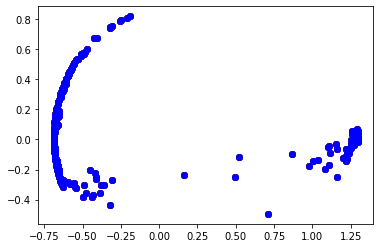

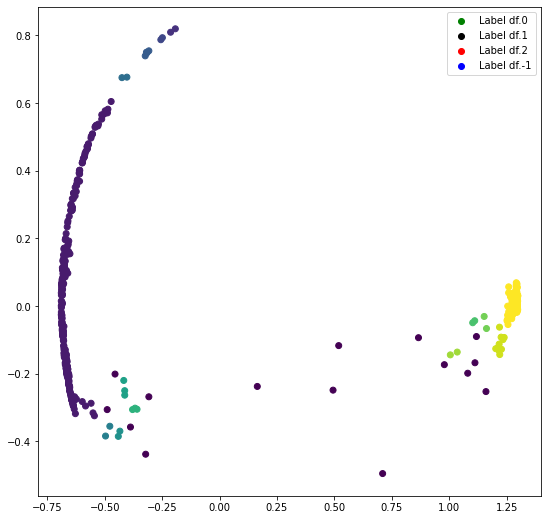

In [ ]:
# Визуализация модели кластеризации путем придания различных цветов
colours = {}
# Первый цвет в визуализации - зеленый
colours[0] = 'g'
# Второй цвет в визуализации - черный
colours[1] = 'k'
# Третий цвет в визуализации - красный
colours[2] = 'r'
# Последний цвет в визуализации - синий
colours[-1] = 'b'
# Построение легенды
# Рассеяние зеленого цвета
g = plt.scatter(df_principal['C1'], df_principal['C2'], color ='g');
# Рассеяние черного цвета
k = plt.scatter(df_principal['C1'], df_principal['C2'], color ='k');
# Рассеяние красного цвета
r = plt.scatter(df_principal['C1'], df_principal['C2'], color ='r');
# Рассеяние зеленого цвета
b = plt.scatter(df_principal['C1'], df_principal['C2'], color ='b');
# Построение графика столбца C1 по оси X и C2 по оси Y
# Подгонка размера фигуры с помощью ее функции
plt.figure(figsize =(9, 9))
# Рассеивание точек данных на графике визуализации
plt.scatter(df_principal['C1'], df_principal['C2'], c = labels)
# Построение легенды с цветными точками данных и помеченными
plt.legend((g, k, r, b),('Label df.0', 'Label df.1', 'Label df.2', 'Label df.-1'))
# Отображение визуализации в выходных данных
plt.show()